In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.model_sgit@github.com:davidflanagan/notMNIST-to-MNIST.gitelection import train_test_split
from sklearn.metrics import confusion_matrix
from mnist_util import *

# Basic setup

Getting the training and test data and calculating means, variances (axis=None, axis=1) and covariances.

In [3]:
training, test = load_sorted_data('data_notMNIST')

means = mean(training)

id = [np.identity(28*28) for _ in range(len(training))]
variances = variance(training)
variances1 = variance(training, axis=0)
covariances = covariance(training)

# Plotting

Here you can see the means and variances of the numbers in the training dataset.

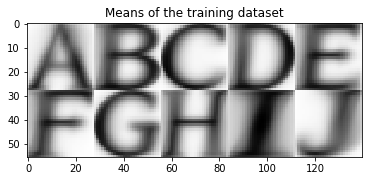

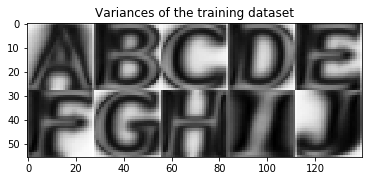

In [4]:
plot_all_numbers(means, elements_per_line=5, plot_title="Means of the training dataset")
plot_all_numbers(variances1, elements_per_line=5, plot_title="Variances of the training dataset")

# PDFs

Using Gaussian multivariate normal distribution (?).
Here I am trying in total 4 different PDFs, where I swapped out the $\Sigma$.

* First one has $\Sigma =$ id.
* Second one has $\Sigma =$ variances.
* Third one has $\Sigma =$ variances1 (The numbers you see above)
* Fourth one has $\Sigma =$ covariances

In [5]:
pdfs_id = multivariates(training, id)
pdfs_var = multivariates(training, variances)
pdfs_var_1 = multivariates(training, variances1)
pdfs_cov = multivariates(training, covariances)

# First test run

Now I am plotting the first 20 numbers of each test dataset (0-9) and thereafter guess/predict the corresponding number with the four PDFs.

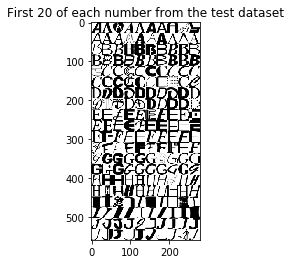

In [6]:
tmp = flatten_lists([test[i][:20] for i in range(10)])
tmp = [np.array(x) for x in tmp]
plot_all_numbers(tmp, elements_per_line=10, plot_title="First 20 of each number from the test dataset")

In [7]:
for i in range(10):
    guess_identity = [tell_number(pdfs_id, num) for num in test[i][:20]]
    guess_variance = [tell_number(pdfs_var, num) for num in test[i][:20]]
    guess_variance_1 = [tell_number(pdfs_var_1, num) for num in test[i][:20]]
    guess_covariance = [tell_number(pdfs_cov, num) for num in test[i][:20]]
    
    print("Right guess: {0}".format(i))
    print("identity:\t{0}\t ERRORS: {1}".format(guess_identity, len([x for x in guess_identity if x != i])))
    print("variance:\t{0}\t ERRORS: {1}".format(guess_variance, len([x for x in guess_variance if x != i])))
    print("variance1:\t{0}\t ERRORS: {1}".format(guess_variance_1, len([x for x in guess_variance_1 if x != i])))
    print("covariance:\t{0}\t ERRORS: {1}".format(guess_covariance, len([x for x in guess_covariance if x != i])))
    print("")

Right guess: 0
identity:	[0, 0, 8, 0, 0, 0, 0, 3, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]	 ERRORS: 4
variance:	[0, 0, 8, 0, 0, 0, 0, 3, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]	 ERRORS: 4
variance1:	[0, 0, 8, 0, 0, 0, 0, 7, 9, 1, 0, 0, 0, 9, 0, 9, 0, 0, 0, 0]	 ERRORS: 6
covariance:	[0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]	 ERRORS: 2

Right guess: 1
identity:	[9, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]	 ERRORS: 2
variance:	[9, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]	 ERRORS: 2
variance1:	[0, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]	 ERRORS: 2
covariance:	[1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1]	 ERRORS: 2

Right guess: 2
identity:	[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 9, 2, 9]	 ERRORS: 3
variance:	[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 9, 2, 9]	 ERRORS: 3
variance1:	[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 4, 7, 2, 4]	 ERRORS: 4
covariance:	[6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

# Second test run
Here I am using the entire test dataset and not only the first 20.

In [8]:
guess_identity = []
guess_variance = []
guess_variance_1 = []
guess_covariance = []
for i in range(10):
    guess_identity.append([tell_number(pdfs_id, num) for num in test[i]])
    guess_variance.append([tell_number(pdfs_var, num) for num in test[i]])
    guess_variance_1.append([tell_number(pdfs_var_1, num) for num in test[i]])
    guess_covariance.append([tell_number(pdfs_cov, num) for num in test[i]])
    
    print("Number: {0}\tAMOUNT: {1}".format(i, len(test[i])))
    print("identity:\tERRORS: {0}".format(len([x for x in guess_identity[i] if x != i])))
    print("variance:\tERRORS: {0}".format(len([x for x in guess_variance[i] if x != i])))
    print("variance_1:\tERRORS: {0}".format(len([x for x in guess_variance_1[i] if x != i])))
    print("covariance:\tERRORS: {0}".format(len([x for x in guess_covariance[i] if x != i])))
    print("")

Number: 0	AMOUNT: 1000
identity:	ERRORS: 224
variance:	ERRORS: 220
variance_1:	ERRORS: 224
covariance:	ERRORS: 88

Number: 1	AMOUNT: 1000
identity:	ERRORS: 246
variance:	ERRORS: 251
variance_1:	ERRORS: 231
covariance:	ERRORS: 77

Number: 2	AMOUNT: 1000
identity:	ERRORS: 168
variance:	ERRORS: 163
variance_1:	ERRORS: 183
covariance:	ERRORS: 173

Number: 3	AMOUNT: 1000
identity:	ERRORS: 213
variance:	ERRORS: 217
variance_1:	ERRORS: 179
covariance:	ERRORS: 147

Number: 4	AMOUNT: 1000
identity:	ERRORS: 289
variance:	ERRORS: 308
variance_1:	ERRORS: 248
covariance:	ERRORS: 83

Number: 5	AMOUNT: 1000
identity:	ERRORS: 125
variance:	ERRORS: 126
variance_1:	ERRORS: 88
covariance:	ERRORS: 85

Number: 6	AMOUNT: 1000
identity:	ERRORS: 288
variance:	ERRORS: 303
variance_1:	ERRORS: 264
covariance:	ERRORS: 77

Number: 7	AMOUNT: 1000
identity:	ERRORS: 273
variance:	ERRORS: 275
variance_1:	ERRORS: 211
covariance:	ERRORS: 138

Number: 8	AMOUNT: 1000
identity:	ERRORS: 181
variance:	ERRORS: 194
variance_1:

# Visualizing the result

Now I am going to visualize the results with confusion matrices.

In [9]:
training_labels = flatten_lists([[i]*len(guess_identity[i]) for i in range(10)])
guess_identity_flat = flatten_lists(guess_identity)
guess_variance_flat = flatten_lists(guess_variance)
guess_variance_1_flat = flatten_lists(guess_variance_1)
guess_covariance_flat = flatten_lists(guess_covariance)

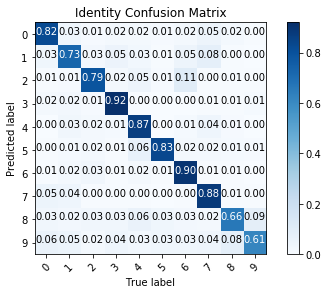

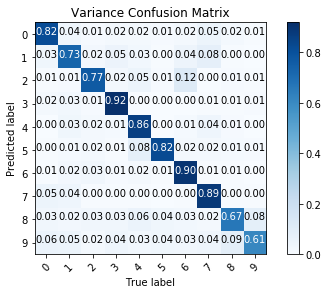

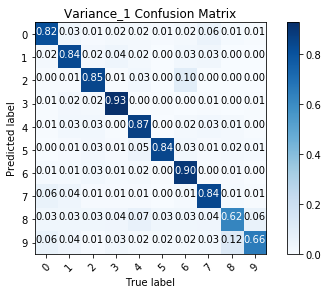

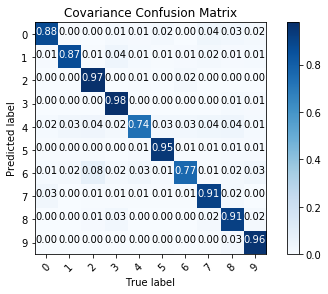

In [10]:
confusion_matrix_identity = confusion_matrix(guess_identity_flat, training_labels)
confusion_matrix_variance = confusion_matrix(guess_variance_flat, training_labels)
confusion_matrix_variance_1 = confusion_matrix(guess_variance_1_flat, training_labels)
confusion_matrix_covariance = confusion_matrix(guess_covariance_flat, training_labels)


class_names = [str(i) for i in range(10)]

plt.figure()
plot_confusion_matrix(confusion_matrix_identity, normalize=True, classes=class_names, title='Identity Confusion Matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix_variance, normalize=True, classes=class_names, title='Variance Confusion Matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix_variance_1, normalize=True, classes=class_names, title='Variance_1 Confusion Matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix_covariance, normalize=True, classes=class_names, title='Covariance Confusion Matrix')

plt.show()